<a href="https://colab.research.google.com/github/Charlsgit/Traffic_Accident_Hotspot_Prediction/blob/main/Traffic_Accident_Hotspot_Prediction(Smart_City).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1: Importing all the liberaries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('/content/drive/MyDrive/Data /RTA Dataset.csv')
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


#Step 2: EDA (Exploratory Data Analysis)

In [2]:
print(df.info()) #To get the null count and datatypes of all the fratures.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [3]:
print(df["Accident_severity"].value_counts()) # where the Accident severiety is the target column.

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64


##• Visualization of Accident Severity Distribution

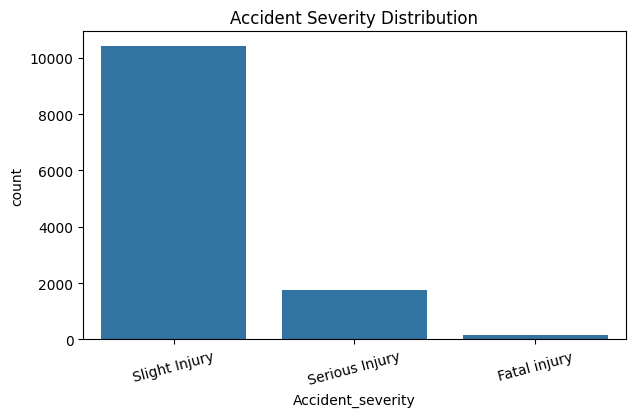

In [4]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x="Accident_severity")
plt.title("Accident Severity Distribution")
plt.xticks(rotation=15)
plt.show()

##• Visualization of Severity based on Day of a Week

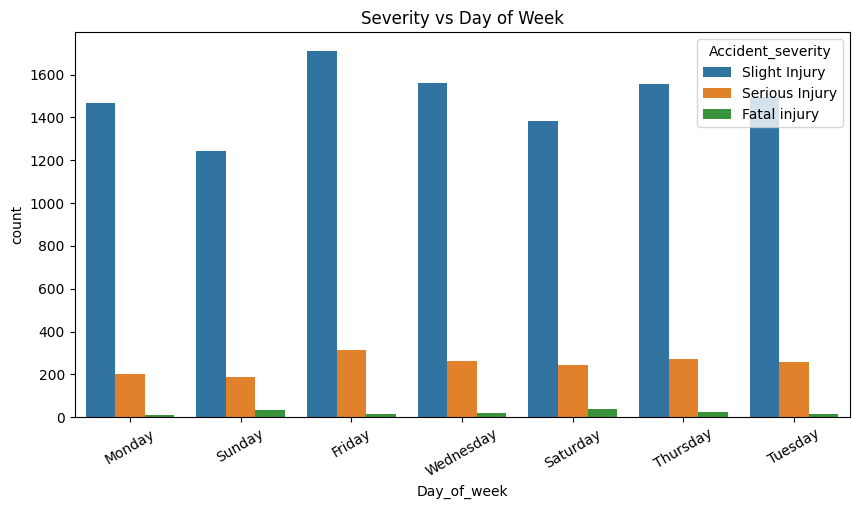

In [5]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Day_of_week", hue="Accident_severity")
plt.title("Severity vs Day of Week")
plt.xticks(rotation=30)
plt.show()

##• Visualization of Severity based on Road Surface Type

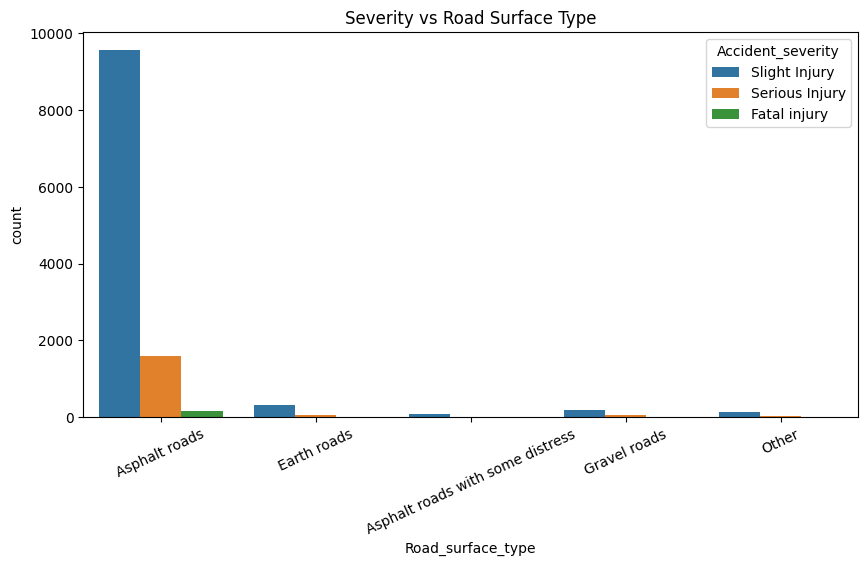

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Road_surface_type", hue="Accident_severity")
plt.title("Severity vs Road Surface Type")
plt.xticks(rotation=25)
plt.show()


#Step 3: Data Cleaning

In [7]:
# Replace 'na' text with NaN as there are a lot of missing values.
df = df.replace("na", np.nan)

In [8]:
# Fill missing values with "Unknown" (safe for categorical dataset)
df = df.fillna("Unknown")

In [9]:
# Check missing values
missing = df.isnull().sum().sort_values(ascending=False)
print(missing)

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

#Step 4: Feature Engineering (Converting the time into Hours)

In [10]:
df["Hour"] = pd.to_datetime(df["Time"], errors="coerce").dt.hour

# If any Hour becomes NaN, fill with mode
df["Hour"] = df["Hour"].fillna(df["Hour"].mode()[0]).astype(int)

df[["Time", "Hour"]].head()

/tmp/ipython-input-1461074345.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Hour"] = pd.to_datetime(df["Time"], errors="coerce").dt.hour


,Time,Hour
0,17:02:00,17
1,17:02:00,17
2,17:02:00,17
3,1:06:00,1
4,1:06:00,1


#Step 5: Building and Training the model

##• Splitting the data

In [11]:
target = "Accident_severity"

x = df.drop(columns=[target, "Time"])   # drop raw Time (we already used Hour)
y = df[target]

##• Building a ML Pipeline using OneHot and Randomforest

In [12]:
cat_cols = x.select_dtypes(include="object").columns    #OneHot - converts categorical data into a numerical format
num_cols = x.select_dtypes(exclude="object").columns

preprocess = ColumnTransformer([("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),("num", "passthrough", num_cols)])

model = RandomForestClassifier(n_estimators=250,random_state=42,class_weight="balanced")

pipe = Pipeline([("prep", preprocess),("model", model)])

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42,stratify=y)

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print(classification_report(y_test, y_pred))   #Accuracy Score = 0.8458 = 0.85

                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        31
Serious Injury       0.00      0.00      0.00       349
 Slight Injury       0.85      1.00      0.92      2084

      accuracy                           0.85      2464
     macro avg       0.28      0.33      0.31      2464
  weighted avg       0.72      0.85      0.78      2464



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##• Visualization of the confusion matrix

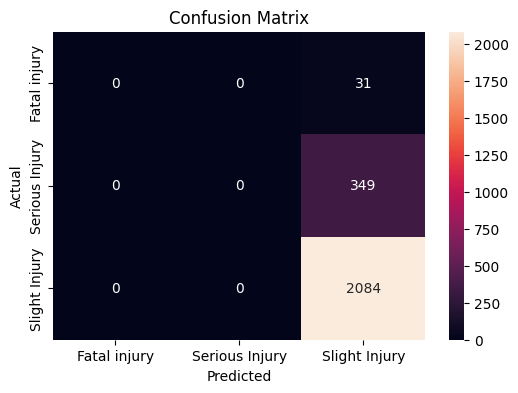

In [13]:
cm = confusion_matrix(y_test, y_pred, labels=pipe.classes_)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=pipe.classes_,
            yticklabels=pipe.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Step 6: Hotspot Analysis

##• Risk Table based on Road Surface Type

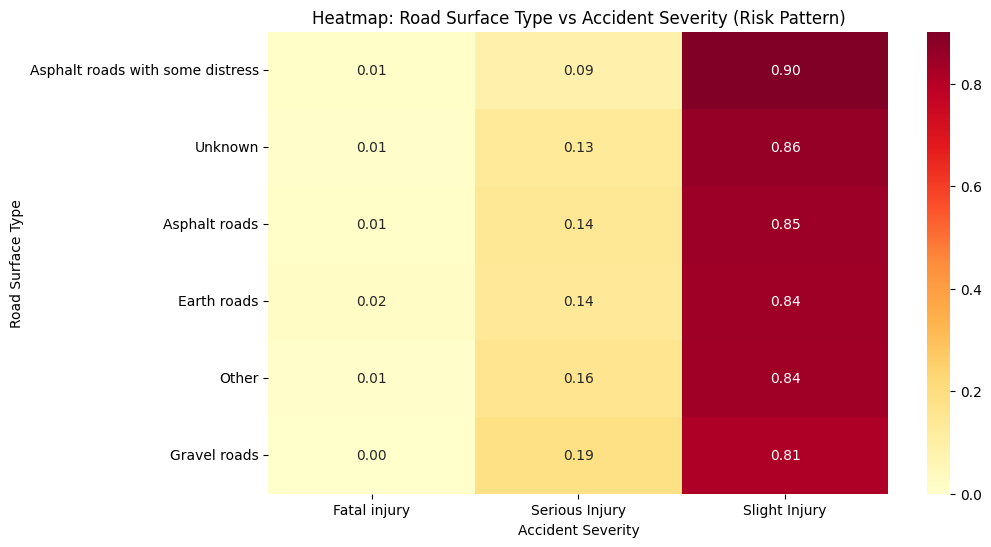

In [17]:
risk_surface = pd.crosstab(df["Road_surface_type"], df["Accident_severity"], normalize="index")
risk_surface = risk_surface.sort_values(by=risk_surface.columns[-1], ascending=False)

plt.figure(figsize=(10,6))
sns.heatmap(risk_surface, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Heatmap: Road Surface Type vs Accident Severity (Risk Pattern)")
plt.xlabel("Accident Severity")
plt.ylabel("Road Surface Type")
plt.show()


##• Dangerous Hours(High Serious/Fatal ratio)

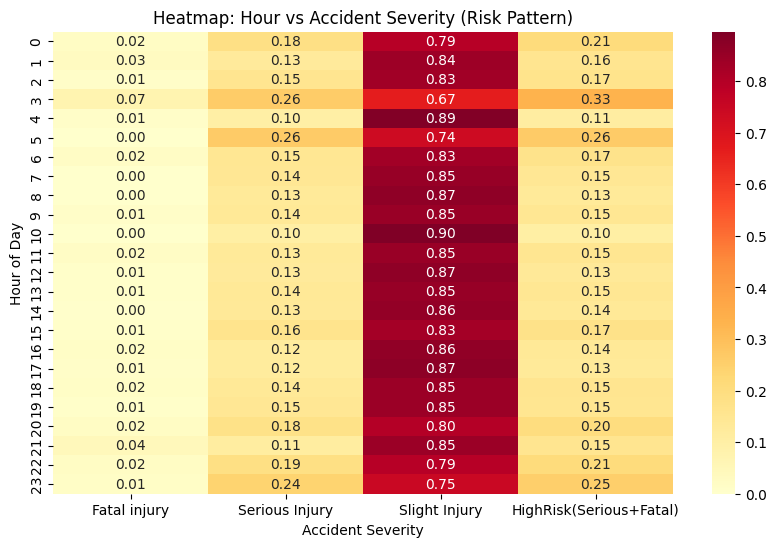

In [19]:
risk_hour = pd.crosstab(df["Hour"], df["Accident_severity"], normalize="index")
risk_hour["HighRisk(Serious+Fatal)"] = (risk_hour.get("Serious Injury", 0) + risk_hour.get("Fatal injury", 0))

plt.figure(figsize=(10,6))
sns.heatmap(risk_hour, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Heatmap: Hour vs Accident Severity (Risk Pattern)")
plt.xlabel("Accident Severity")
plt.ylabel("Hour of Day")
plt.show()

##• Ranking the Causes of Accident.

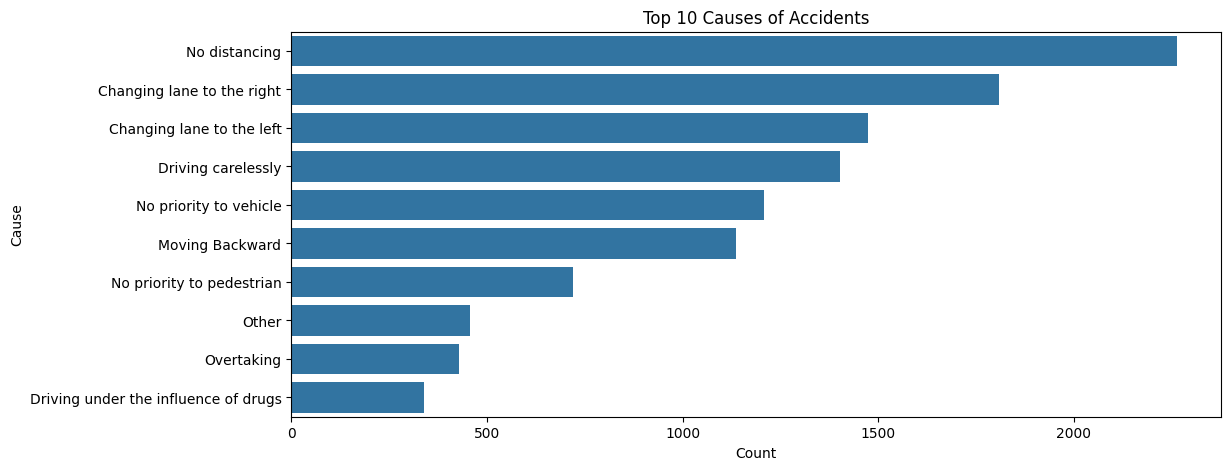

In [16]:
plt.figure(figsize=(12,5))
top_causes = df["Cause_of_accident"].value_counts().head(10)

sns.barplot(x=top_causes.values, y=top_causes.index)
plt.title("Top 10 Causes of Accidents")
plt.xlabel("Count")
plt.ylabel("Cause")
plt.show()